## Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [6]:
# --- 1. Setup: Generate Sample Data
def create_sample_csv():
    data = {
        'Product': ['Laptop', 'Mouse', 'Monitor', 'Keyboard', 'Laptop', 'Mouse', 'Monitor', 'Keyboard'],
        'Region': ['North', 'North', 'North', 'North', 'South', 'South', 'South', 'South'],
        'Price': [1000, 25, 300, 50, 1100, 30, 320, 55],
        'Units_Sold': [50, 200, 80, 150, 45, 180, 75, 140],
        'Customer_Rating': [4.5, 4.0, 4.8, 4.2, 4.6, 3.9, 4.7, 4.1]
    }
    df = pd.DataFrame(data)
    df.to_csv('sales_data.csv', index=False)
    print("✅ Sample 'sales_data.csv' created.")

create_sample_csv()

✅ Sample 'sales_data.csv' created.


In [8]:
# --- 2. Data Loading & Basic Analysis ---
print("\n--- Data Analysis ---")
# Load the CSV
df = pd.read_csv('sales_data.csv')

# Display first few rows
print("First 5 rows:")
print(df.head())

# Calculate Average Price
avg_price = df['Price'].mean()
print(f"\nAverage Product Price: ${avg_price:.2f}")

# Calculate Total Revenue per Product (Price * Units)
df['Revenue'] = df['Price'] * df['Units_Sold']
total_revenue = df['Revenue'].sum()
print(f"Total Revenue Generated: ${total_revenue:,.2f}")


--- Data Analysis ---
First 5 rows:
    Product Region  Price  Units_Sold  Customer_Rating
0    Laptop  North   1000          50              4.5
1     Mouse  North     25         200              4.0
2   Monitor  North    300          80              4.8
3  Keyboard  North     50         150              4.2
4    Laptop  South   1100          45              4.6

Average Product Price: $360.00
Total Revenue Generated: $173,100.00


C:\Users\piyus\AppData\Local\Temp\ipykernel_9504\3765204260.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product', y='Revenue', data=df, palette='viridis')


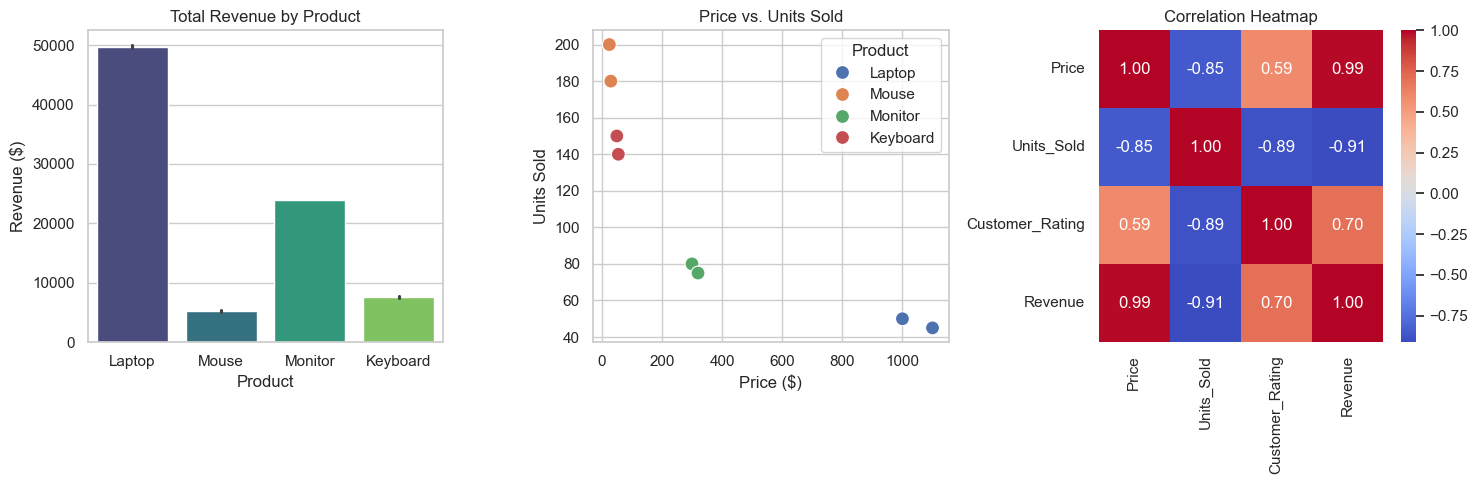

In [9]:
# --- 3. Visualizations ---
# Set the visual style
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15, 5)) # Create a wide canvas

# A. Bar Chart: Revenue by Product
plt.subplot(1, 3, 1) # 1 row, 3 columns, position 1
sns.barplot(x='Product', y='Revenue', data=df, palette='viridis')
plt.title('Total Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Revenue ($)')

# B. Scatter Plot: Price vs. Units Sold
plt.subplot(1, 3, 2) # Position 2
sns.scatterplot(x='Price', y='Units_Sold', data=df, hue='Product', s=100)
plt.title('Price vs. Units Sold')
plt.xlabel('Price ($)')
plt.ylabel('Units Sold')

# C. Heatmap: Correlation Matrix
# We only correlate numeric columns
plt.subplot(1, 3, 3) # Position 3
numeric_df = df.select_dtypes(include=[np.number])
correlation = numeric_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')

# Show all plots
plt.tight_layout()
plt.show()